In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%precision 3

'%.3f'

In [3]:
df=pd.read_csv('ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [4]:
scores=np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [5]:
scores_df=pd.DataFrame({'score':scores},
                       index=pd.Index(['A','B','C','D','E',
                                       'F','G','H','I','J'],
                                       name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [6]:
# 평균값
sum(scores)/ len(scores)
np.mean(scores)
scores_df.mean()

score    55.0
dtype: float64

In [7]:
sorted_scores=np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [8]:
# 중앙값
n=len(sorted_scores)
if n % 2==0:
    m0=sorted_scores[n//2-1]
    m1=sorted_scores[n//2]
    median=(m0+m1)/2
else: median=sorted_scores[(n+1)//2 -1]
median

56.500

In [9]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [10]:
# 편차
mean=np.mean(scores)
deviation=scores-mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [11]:
# 편차 비교
summary_df=scores_df.copy()
summary_df['deviation']=deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [12]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

In [13]:
# 분산
np.mean(deviation**2)

86.000

In [14]:
# Numpy의 var 함수
np.var(scores)

86.000

In [15]:
# 불편분산
scores_df.var()

score    95.555556
dtype: float64

In [16]:
# NumPy로 분산 계산
# - summary_df에 편차의 제곱 열 추가
summary_df['square of deviation']=np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [17]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))

9.274

In [18]:
np.std(scores,ddof=0)

9.274

In [19]:
# 범위
np.max(scores)-np.min(scores)

28

In [20]:
# 사분위 범위
scores_Q1=np.percentile(scores, 25)
scores_Q3=np.percentile(scores, 75)
scores_IQR=scores_Q3 - scores_Q1
scores_IQR

15.000

In [21]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [22]:
# 표준화
z=(scores-np.mean(scores))/np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [23]:
# 편찻값
z=50+10*(scores-np.mean(scores))/np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [24]:
# 점수와 편찻값의 관계
scores_df['deviation value']=z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [25]:
# 데이터의 시각화
english_scores=np.array(df['english'])
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [26]:
# 도수분포표
freq, _=np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [27]:
freq_class=[f'{i}~{i+10}'for i in range(0,100, 10)]
freq_dist_df=pd.DataFrame({'frequency':freq},index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [28]:
# 계급값
class_value=[(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [30]:
# 상대도수
rel_freq=freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [31]:
# 누적상대도수
cum_rel_freq=np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [33]:
# 계긊값, 상대도수, 누적상대도수를 도수분포표에 추가
freq_dist_df['class value']=class_value
freq_dist_df['relative frequency']=rel_freq
freq_dist_df['cumulative relative frequency']=cum_rel_freq
freq_dist_df=freq_dist_df[['class value','frequency',
                           'relative frequency', 'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [34]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

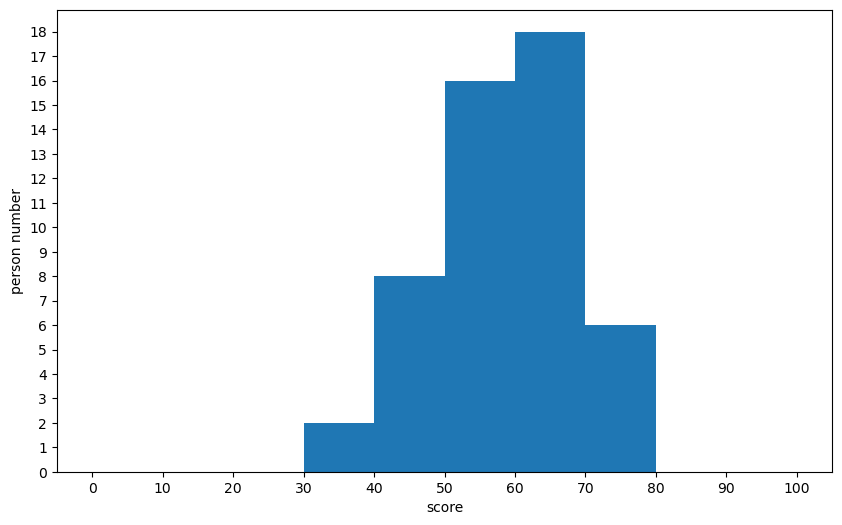

In [36]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111)
freq,_,_=ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

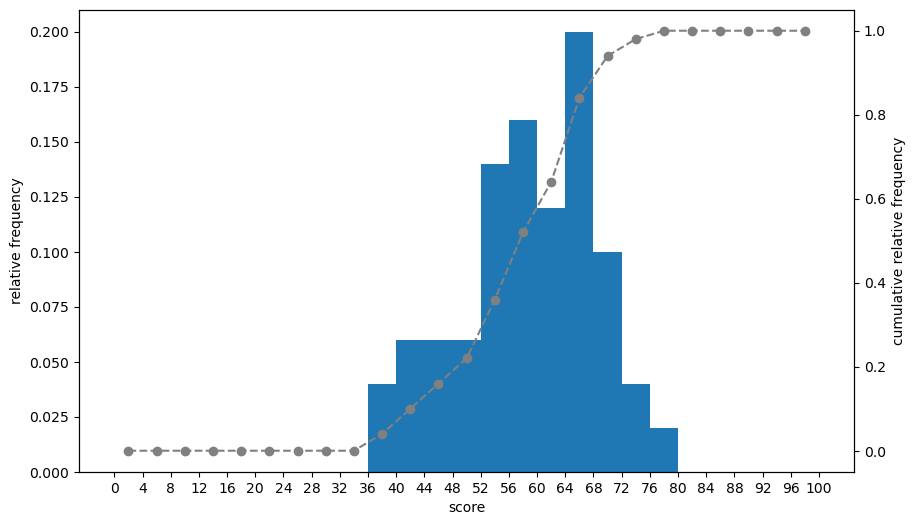

In [38]:
# 히스토그램
# - 계급수를 25, 즉 계급폭을 4점으로 하는 히스토그램을 누적 상대도수의 꺾은선 그래프와 함께 그림
fig=plt.figure(figsize=(10,6))
ax1=fig.add_subplot(111)
ax2=ax1.twinx()

weights=np.ones_like(english_scores) / len(english_scores)
rel_freq,_,_=ax1.hist(english_scores, bins=25,range=(0,100),weights=weights)
cum_rel_freq=np.cumsum(rel_freq)
class_value=[(i+(i+4))//2 for i in range(0,100,4)]
ax2.plot(class_value,cum_rel_freq, ls='--', marker='o',color='gray')
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()